In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.preprocessing import image 

In [3]:
from tensorflow.keras.optimizers import RMSprop

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import os

In [16]:
Train = ImageDataGenerator(rescale =1/255)
Validate = ImageDataGenerator(rescale =1/255)

In [17]:
Train_dataset = Train.flow_from_directory('./new/Train/',
                                         target_size = (200,200),
                                         batch_size = 10,
                                         class_mode = 'binary')

Found 388 images belonging to 2 classes.


In [18]:
Validation_dataset = Validate.flow_from_directory('./new/Validate/',
                                         target_size = (200,200),
                                         batch_size = 10,
                                         class_mode = 'binary')

Found 56 images belonging to 2 classes.


In [19]:
Train_dataset.class_indices

{'Dhoni': 0, 'virat': 1}

In [25]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3) , activation='relu',input_shape = (200,200,3)),
  tf.keras.layers.MaxPooling2D(2,2),
     
  tf.keras.layers.Conv2D(32, (3,3) , activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
     
  tf.keras.layers.Conv2D(64, (3,3) , activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
    
  tf.keras.layers.Conv2D(32, (3,3) , activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
    
  tf.keras.layers.Conv2D(16, (3,3) , activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [26]:
model.compile(optimizer= 'adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [27]:
model_fit = model.fit(Train_dataset,
                      epochs = 25,
                     validation_data = Validation_dataset)

Epoch 1/25
39/39 [==============================] - 12s 272ms/step - loss: 0.6852 - accuracy: 0.5515 - val_loss: 0.6991 - val_accuracy: 0.5000
Epoch 2/25
39/39 [==============================] - 10s 262ms/step - loss: 0.6936 - accuracy: 0.5284 - val_loss: 0.6837 - val_accuracy: 0.5000
Epoch 3/25
39/39 [==============================] - 10s 267ms/step - loss: 0.6644 - accuracy: 0.5722 - val_loss: 0.6311 - val_accuracy: 0.5357
Epoch 4/25
39/39 [==============================] - 14s 361ms/step - loss: 0.6343 - accuracy: 0.6263 - val_loss: 0.6039 - val_accuracy: 0.5893
Epoch 5/25
39/39 [==============================] - 14s 358ms/step - loss: 0.6159 - accuracy: 0.6289 - val_loss: 0.6278 - val_accuracy: 0.6071
Epoch 6/25
39/39 [==============================] - 11s 275ms/step - loss: 0.5564 - accuracy: 0.7216 - val_loss: 0.4936 - val_accuracy: 0.7857
Epoch 7/25
39/39 [==============================] - 10s 255ms/step - loss: 0.5031 - accuracy: 0.7577 - val_loss: 0.4663 - val_accuracy: 0.7857

In [28]:
dir_path = 'new/Test'

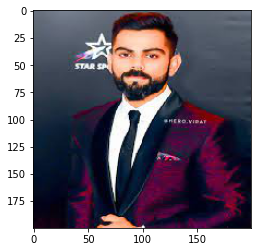

1/1 [==============================] - 0s 131ms/step
you are  virat


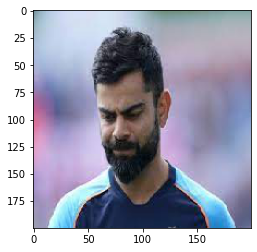

1/1 [==============================] - 0s 28ms/step
you are  virat


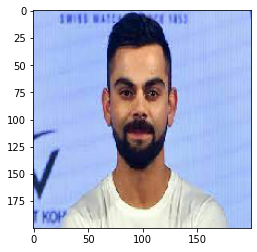

1/1 [==============================] - 0s 26ms/step
you are dhoni


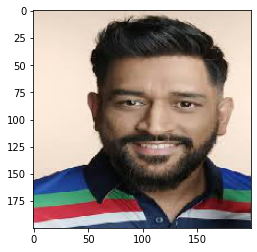

1/1 [==============================] - 0s 30ms/step
you are dhoni


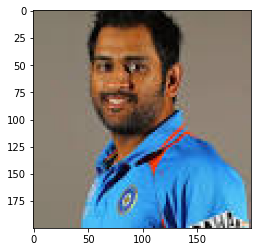

1/1 [==============================] - 0s 35ms/step
you are dhoni


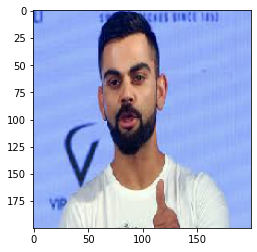

1/1 [==============================] - 0s 31ms/step
you are  virat


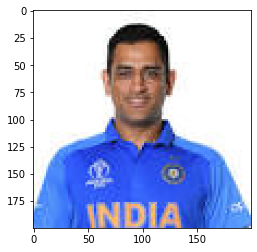

1/1 [==============================] - 0s 28ms/step
you are dhoni


In [29]:
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size = (200,200))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X =np.expand_dims(X,axis =0)
    images = np.vstack([X])
    Val = model.predict(images)
    if Val ==1:
        print("you are  virat")
        
    else:
        print("you are dhoni")